# Quick-Look Spectra with Muler

[muler](https://muler.readthedocs.io/en/latest/index.html) is a python package that allows for quick viewing of IGRINS spectra. muler inherits from [specutils](https://specutils.readthedocs.io/en/stable/) meaning that most any spectral manipulation that can be done using specutils also works with the IGRINSSpectrum objects from muler!

In this tutorial we will walk through the basics of using muler and we recommend users of RRISA check out the [muler tutorial page](https://muler.readthedocs.io/en/latest/tutorials/index.html) which provides many useful tutorials for muler.

In [1]:
from muler.igrins import IGRINSSpectrumList, IGRINSSpectrum
import pandas as pd

We can start by reading in all of the orders from an IGRINS H band image. We will use V* V830 Tau since that is the file we unzipped in the Quickstart tutorial!

In [2]:
#H band spectra path
path_H = '20170915/V_V830_Tau/20170915_0049/SDCH_20170915_0049.spec_a0v.fits'

<Axes: xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

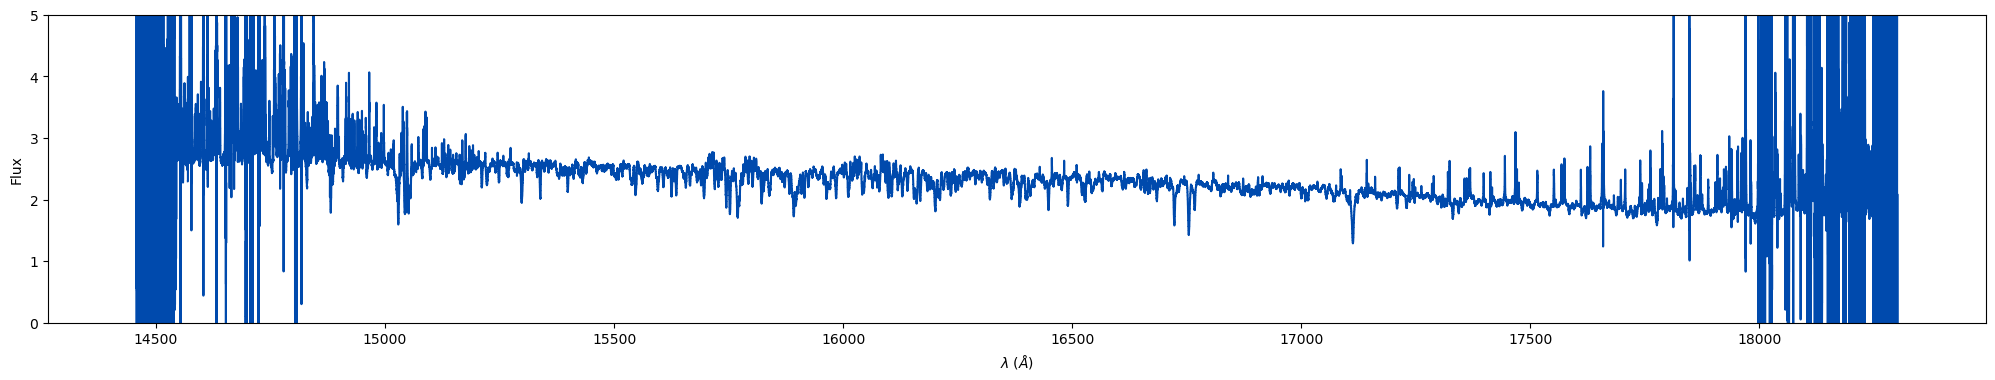

In [4]:
#read in the spec_a0v.fits file
spec_list = IGRINSSpectrumList.read(path_H)
#muler allows you to chain link functions so you can clean up the spectrum before it is plotted!
spec_list.remove_nans().trim_edges().normalize().plot(color='#004aad', ylo=0, yhi=5)

Sometimes when doing spectral manipulation it can be easier to stitch both the H & K bands together

In [5]:
#K band spectra path
path_K = '20170915/V_V830_Tau/20170915_0049/SDCK_20170915_0049.spec_a0v.fits'

In [6]:
spec_list = IGRINSSpectrumList.read(path_H)
spec_list.extend(IGRINSSpectrumList.read(path_K))

<Axes: xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

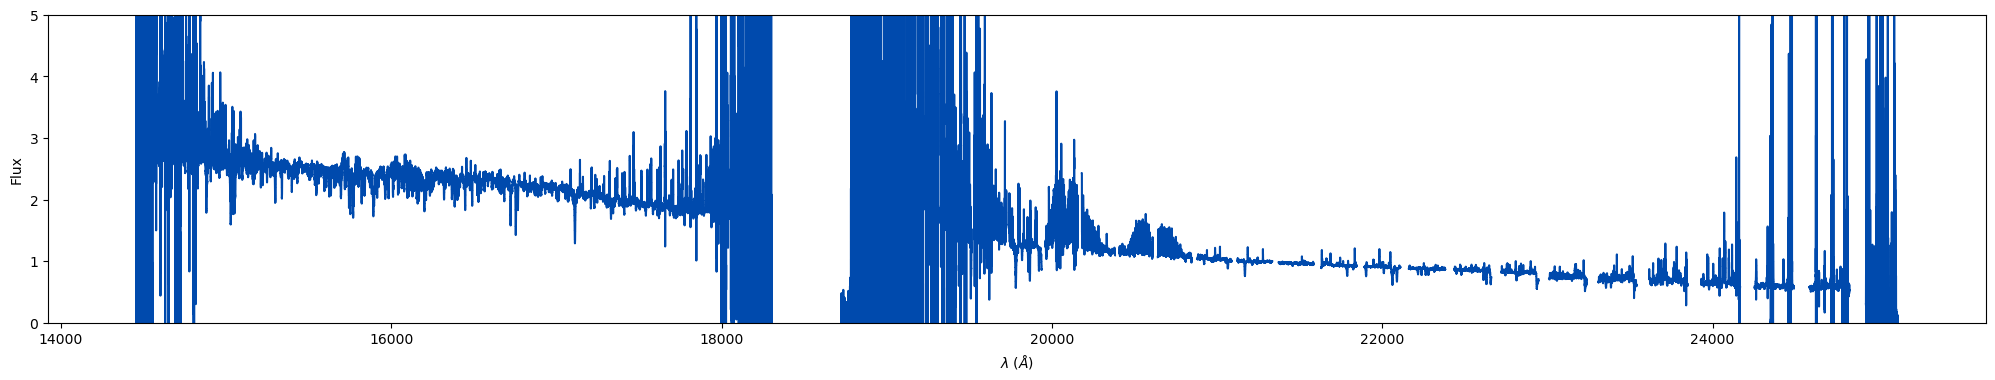

In [10]:
spec_list.remove_nans().trim_edges().normalize().plot(color='#004aad', ylo=0, yhi=5)

Or we can read in a single order from either H or K band!

<Axes: xlabel='$\\lambda \\;(\\AA)$', ylabel='Flux'>

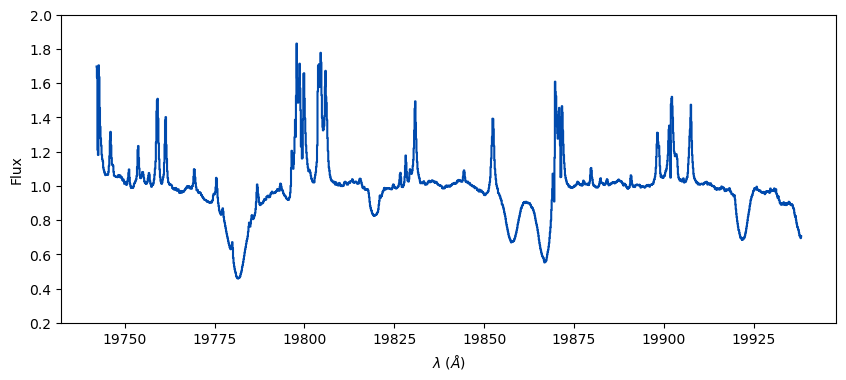

In [22]:
order = IGRINSSpectrum(file=path_K, order = 19)
order.remove_nans().trim_edges().normalize().plot(color='#004aad', ylo=0.2, yhi=2)

You can also plot on pre-configured matplotlib axes. Here is an example plotting 3 orders in the CO region of K-band.

Text(0.5, 0, 'Wavelength [$\\AA$]')

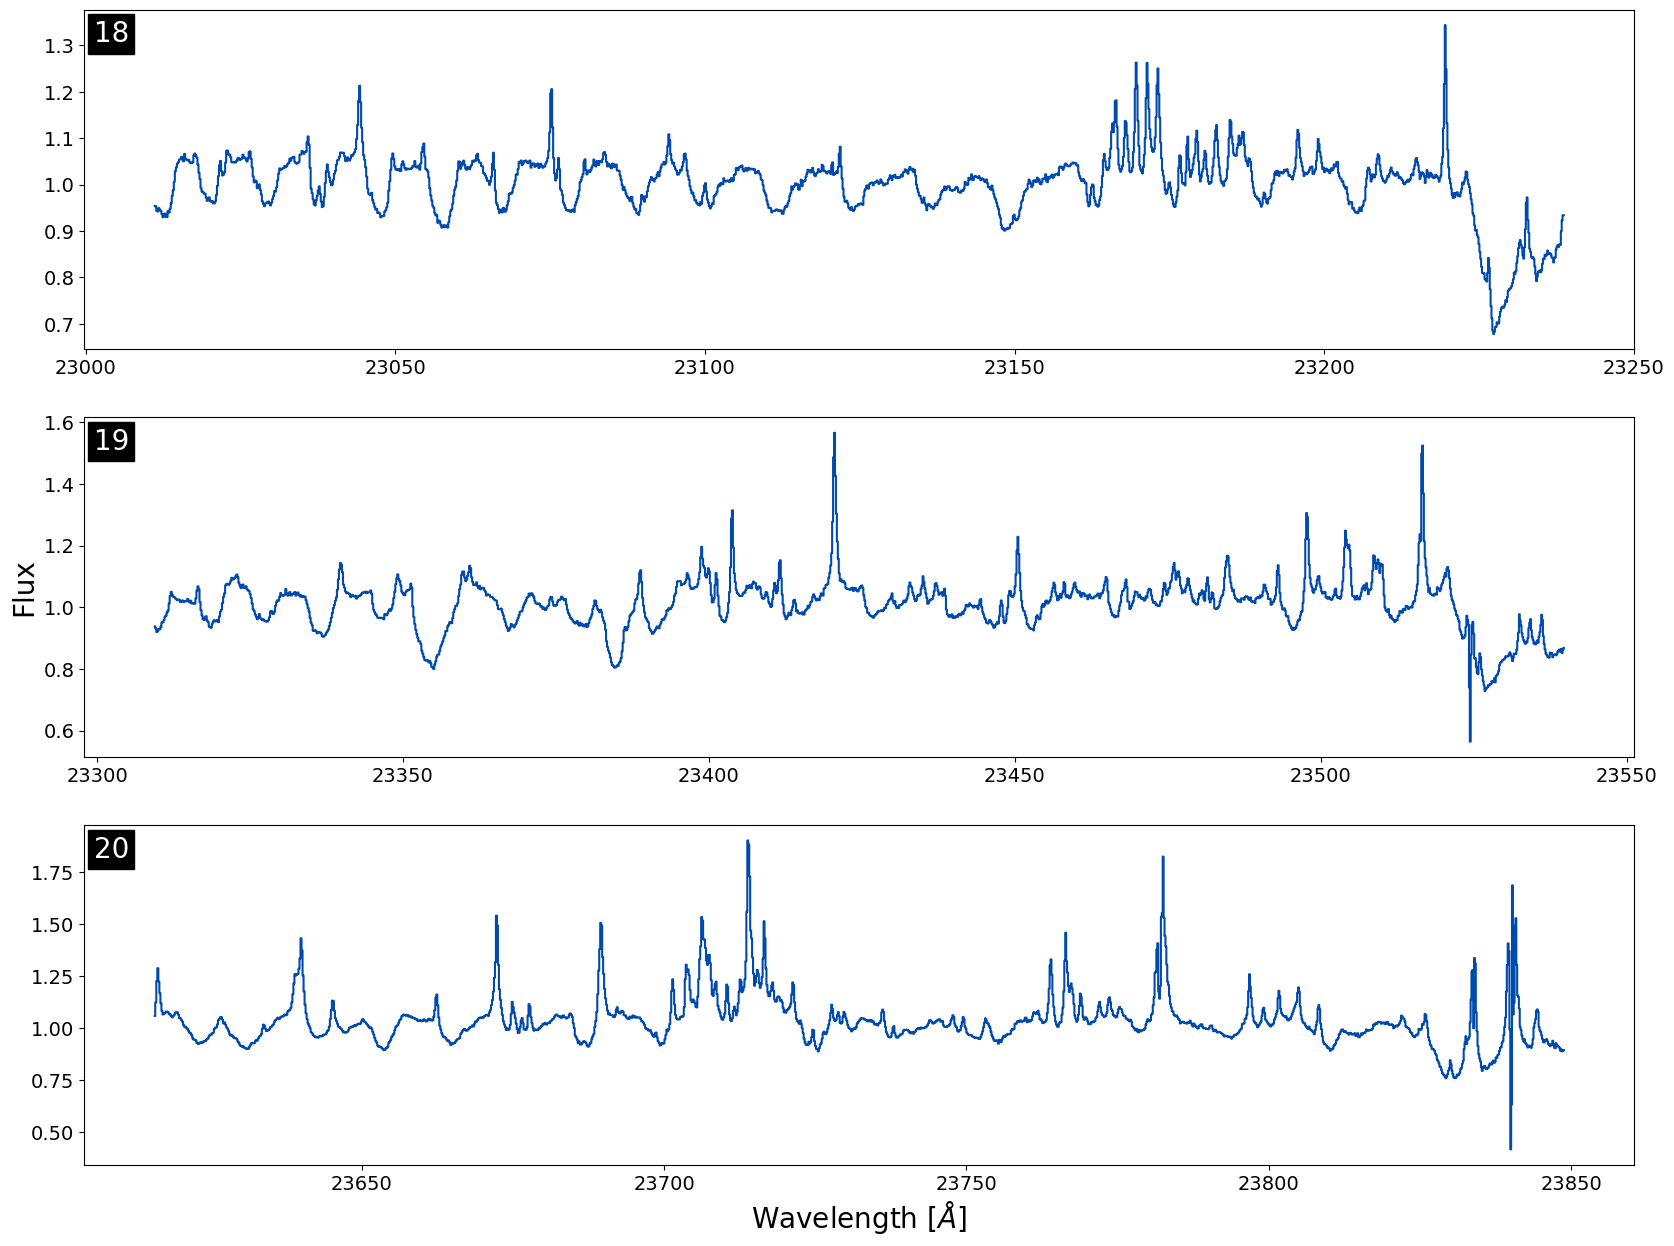

In [24]:
import matplotlib.pylab as plt
#this will change the fontsize of the x- and y-tick labels
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)

spec_list = IGRINSSpectrumList.read(path_K)

#select our orders to plot
orders = [18, 19, 20]

#generate the figure and axes to plot on
fig, axes = plt.subplots(3, 1, figsize = (20, 15), facecolor = 'white')

#initalized so we can move through our list of axes
i = 0
#for each order of interest
for order in orders:
    #plot a normalized, trimmed order to a particular axis on the plot
    spec_list[order].normalize().trim_edges().plot(color = '#004aad', ax = axes[i])
    #add an order label in the top left hand corner of the plot
    axes[i].text(0.006,0.905, f'{order}', transform = axes[i].transAxes, c = 'white', fontsize = 20, ma = 'center',
                 bbox = dict(facecolor='k', edgecolor='k'))
    #add one to the iteration so we move to the next plot axis
    i += 1

#add axes labels for x and y
axes[1].set_ylabel('Flux', fontsize = 20)
axes[-1].set_xlabel(r'Wavelength [$\AA$]', fontsize = 20)